In [1]:
import torch
from torch import nn, optim
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, TensorDataset

In [2]:
class Recorder():
    def __init__(self, *args):
        self.arg_vals= {i: list() for i in args}
        
    def update(self, arg, val):
        self.arg_vals[arg].append(val)

# creating a toy dataset

In [3]:
x=torch.randn((100, 100))
y=torch.randint(5, (1, 100)).squeeze_(0)

In [4]:
ds= TensorDataset(x, y)
dl= DataLoader(ds, batch_size=5)

In [5]:
model= nn.Sequential(nn.Linear(100, 1), nn.ReLU())

## Cosine annealing learning rate

this is the most common learning rate scheduler used in the industry
the analogy is when we start training the neural network we can can take large steps towards convergence of the neural network and when the neural network has learnt most of the representation from the data we take small steps in the data so we dont move far from the convergence

In [6]:
recorder=Recorder('lr', 'mom')
optimizer = optim.SGD(model.parameters(), lr=1.)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, 50)
for epoch in range(50):
    recorder.update('lr',scheduler.optimizer.param_groups[0]['lr'])
    recorder.update('mom', scheduler.optimizer.param_groups[0]['momentum'])
    optimizer.step()
    scheduler.step()

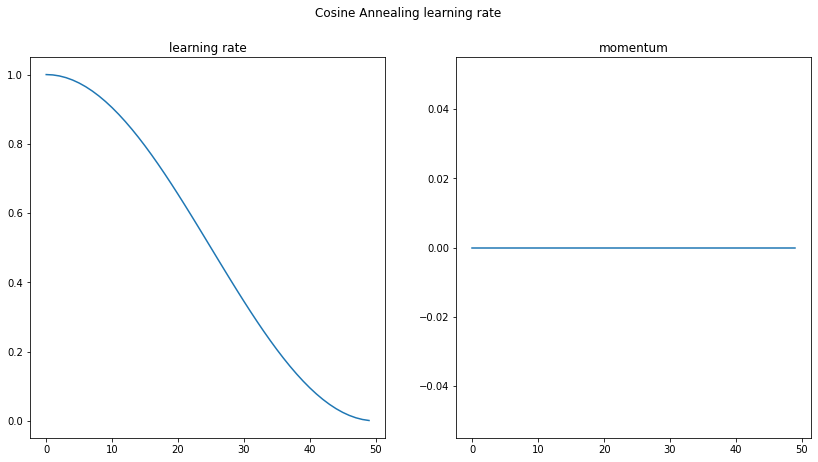

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

fig.suptitle('Cosine Annealing learning rate')
axes[0].set_title('learning rate')
axes[0].plot(recorder.arg_vals['lr'])
axes[1].set_title('momentum')
axes[1].plot(recorder.arg_vals['mom'])

## Cyclic learning rate

In [8]:
recorder=Recorder('lr', 'mom')
optimizer = optim.SGD(model.parameters(), lr=1.)
scheduler = optim.lr_scheduler.CyclicLR(optimizer,base_lr=0.0001,max_lr= 1., step_size_up=25)
for epoch in range(50):
    recorder.update('lr',scheduler.optimizer.param_groups[0]['lr'])
    recorder.update('mom', scheduler.optimizer.param_groups[0]['momentum'])
    optimizer.step()
    scheduler.step()

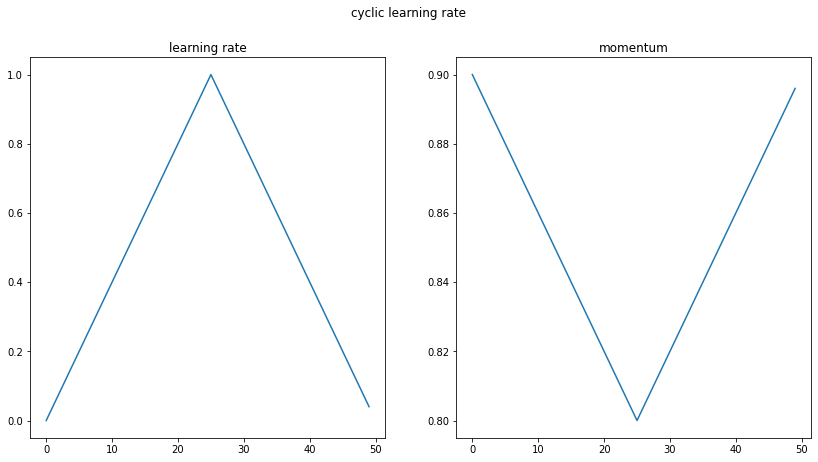

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

fig.suptitle('cyclic learning rate')
axes[0].set_title('learning rate')
axes[0].plot(recorder.arg_vals['lr'])
axes[1].set_title('momentum')
axes[1].plot(recorder.arg_vals['mom'])

## One cycle learning rate

In [10]:
recorder=Recorder('lr', 'mom')
optimizer = optim.SGD(model.parameters(), lr=1.)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer,max_lr= 1., total_steps=50)
for epoch in range(50):
    recorder.update('lr',scheduler.optimizer.param_groups[0]['lr'])
    recorder.update('mom', scheduler.optimizer.param_groups[0]['momentum'])
    optimizer.step()
    scheduler.step()

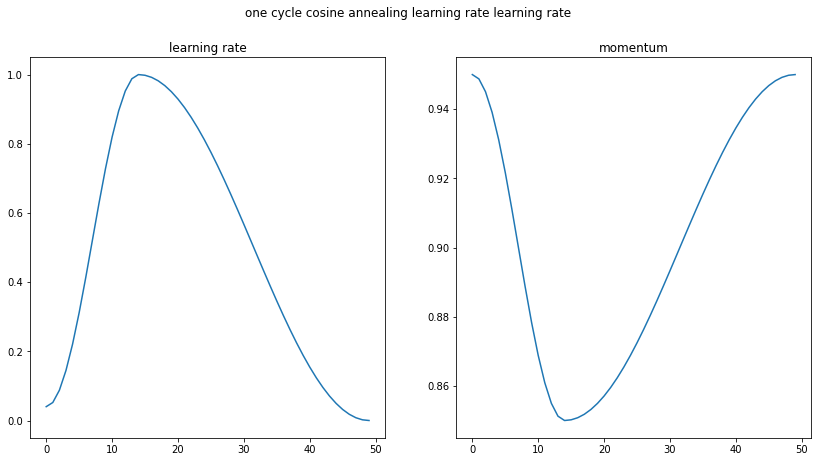

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

fig.suptitle('one cycle cosine annealing learning rate learning rate')
axes[0].set_title('learning rate')
axes[0].plot(recorder.arg_vals['lr'])
axes[1].set_title('momentum')
axes[1].plot(recorder.arg_vals['mom'])

## Cosine annealing with warm restarts

this type of training regimes help when the model is stuck in some local minima and having a sudden change in learning rate can help in it moving from that minima towards the global maxima

In [12]:
recorder=Recorder('lr', 'mom')
optimizer = optim.SGD(model.parameters(), lr=1.)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=20, T_mult=2)
for epoch in range(50):
    recorder.update('lr',scheduler.optimizer.param_groups[0]['lr'])
    recorder.update('mom', scheduler.optimizer.param_groups[0]['momentum'])
    optimizer.step()
    scheduler.step()

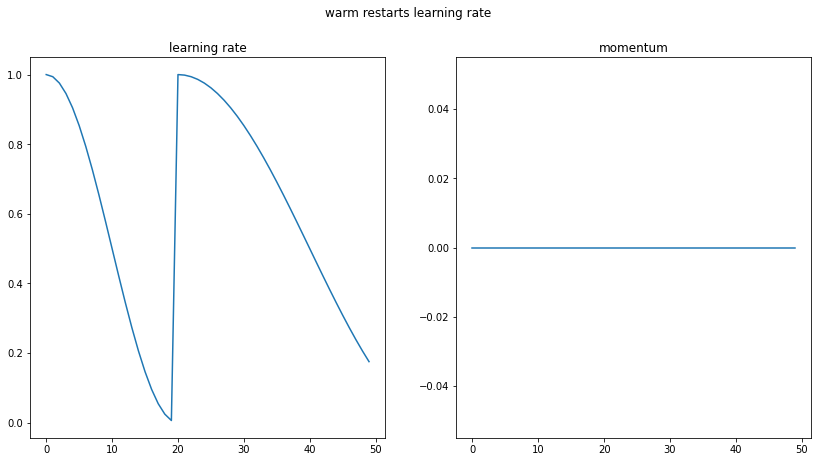

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

fig.suptitle('warm restarts learning rate')
axes[0].set_title('learning rate')
axes[0].plot(recorder.arg_vals['lr'])
axes[1].set_title('momentum')
axes[1].plot(recorder.arg_vals['mom'])